# Baseball Case Study


Problem Statement:
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

-- Output: Number of predicted wins (W)

To understand the columns meaning, follow the link given below to understand the baseball statistics: https://en.wikipedia.org/wiki/Baseball_statistics 

In [109]:
#Importing the requird libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [193]:
# importing the dataset
df=pd.read_csv('baseball.csv')

In [194]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


By loking at the first few lines of the data set it is clear that categorial variables are not there in the sata set

The abriviations are used as the variable neames as  well in the data set.

## EDA (Exploratory Data Analysis)

In [195]:
# finding out the total number of rows and  columns in the data set
df.shape

(30, 17)

The output shows that there are 30 rows and 17 columns (including te target variable)in teh data set.

In [196]:
#Finding out the types of the varibles 
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

The output shows that all the variables are numerical in nature (i.e. either integer or float)
Categorical data is not present in the data set.

In [197]:
# Information about the column names
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [198]:
# finding out the data types and null values in the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [199]:
# Finding the null values in the data set
df.isnull().sum()

# The output shows that there are no null values in the dataset.

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

There are no null values present in the data set.

<AxesSubplot:>

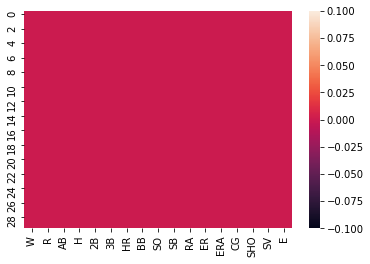

In [200]:
# Null values detection with the help of heatmap
sns.heatmap(df.isnull())

It is also confirmed fro the heatmap that the data set has no null values.

#### Checking the Staistical Summary

In [201]:
df=pd.DataFrame(data=df)
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [202]:
df.describe().T # transpose is used for the better view of the summary

,count,mean,std,min,25%,50%,75%,max
W,30.0,80.966667,10.453455,63.00,74.0000,81.000,87.75,100.00
R,30.0,688.233333,58.761754,573.00,651.2500,689.000,718.25,891.00
AB,30.0,5516.266667,70.467372,5385.00,5464.0000,5510.000,5570.00,5649.00
H,30.0,1403.533333,57.140923,1324.00,1363.0000,1382.500,1451.50,1515.00
2B,30.0,274.733333,18.095405,236.00,262.2500,275.500,288.75,308.00
3B,30.0,31.300000,10.452355,13.00,23.0000,31.000,39.00,49.00
HR,30.0,163.633333,31.823309,100.00,140.2500,158.500,177.00,232.00
BB,30.0,469.100000,57.053725,375.00,428.2500,473.000,501.25,570.00
SO,30.0,1248.200000,103.759470,973.00,1157.5000,1261.500,1311.50,1518.00
SB,30.0,83.500000,22.815225,44.00,69.0000,83.500,96.50,134.00


1. The mean in few variables (AB,H,3B,HR,CG,SV,E) is higher than the median and whenever mean is higher then median then there is skewness present in the data.
2. As the standard deviation is high in most of the cases shows that the data spread is high.

In [203]:
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

The column "R","H","CG" and "E" have high positive skewness values--- which shows that the data is rightly skewed.

<AxesSubplot:xlabel='R', ylabel='Density'>

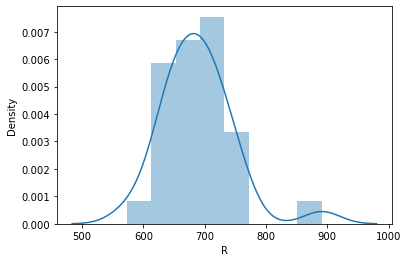

In [204]:
sns.distplot(df['R']) # confirming the skewness present in the variable "R" with the heip of distplot

<AxesSubplot:xlabel='H', ylabel='Density'>

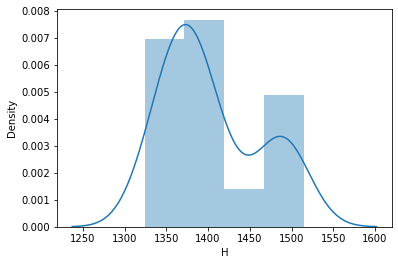

In [205]:
sns.distplot(df['H']) # confirming the skewness present in the variable "H" with the heip of distplot

<AxesSubplot:xlabel='CG', ylabel='Density'>

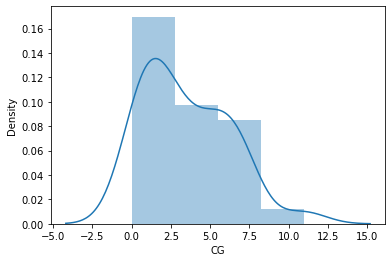

In [206]:
sns.distplot(df['CG']) # confirming the skewness present in the variable "CG" with the heip of distplot

<AxesSubplot:xlabel='E', ylabel='Density'>

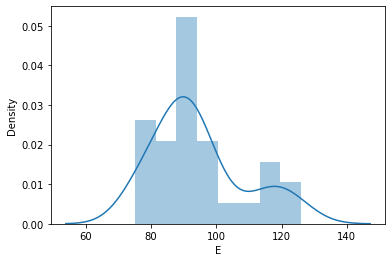

In [207]:
sns.distplot(df['E']) # confirming the skewness present in the variable "E" with the heip of distplot

From the above distplots it is confirmed that the mentioned variables are skewed in nature, this might be because of the nature of the featuring variable.

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

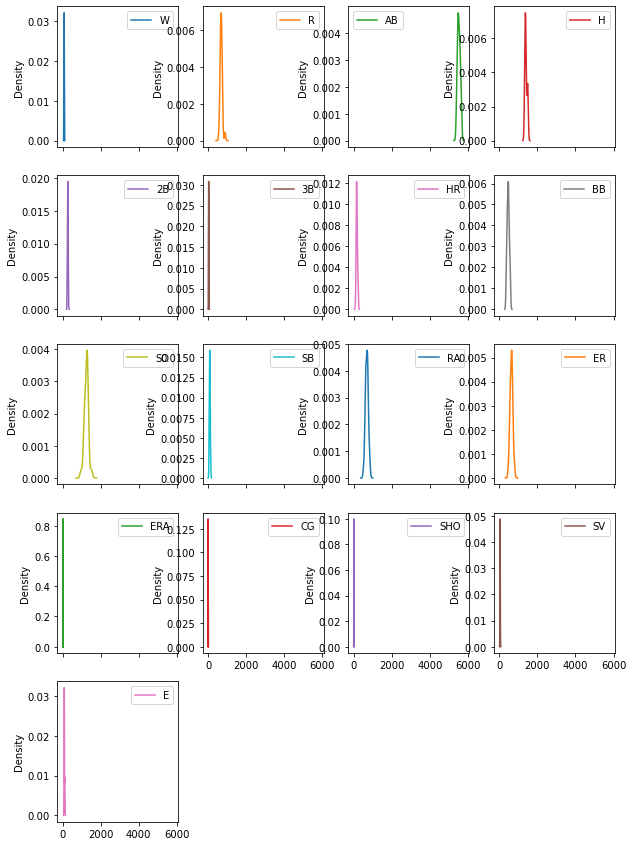

In [208]:
df.plot(kind='kde',subplots=True,layout=(5,4),figsize=(10,15))  # kde= kernel density estimation

The above density plots shows that the data is nearly normaly distributed except some variables as clear through the dist plots.

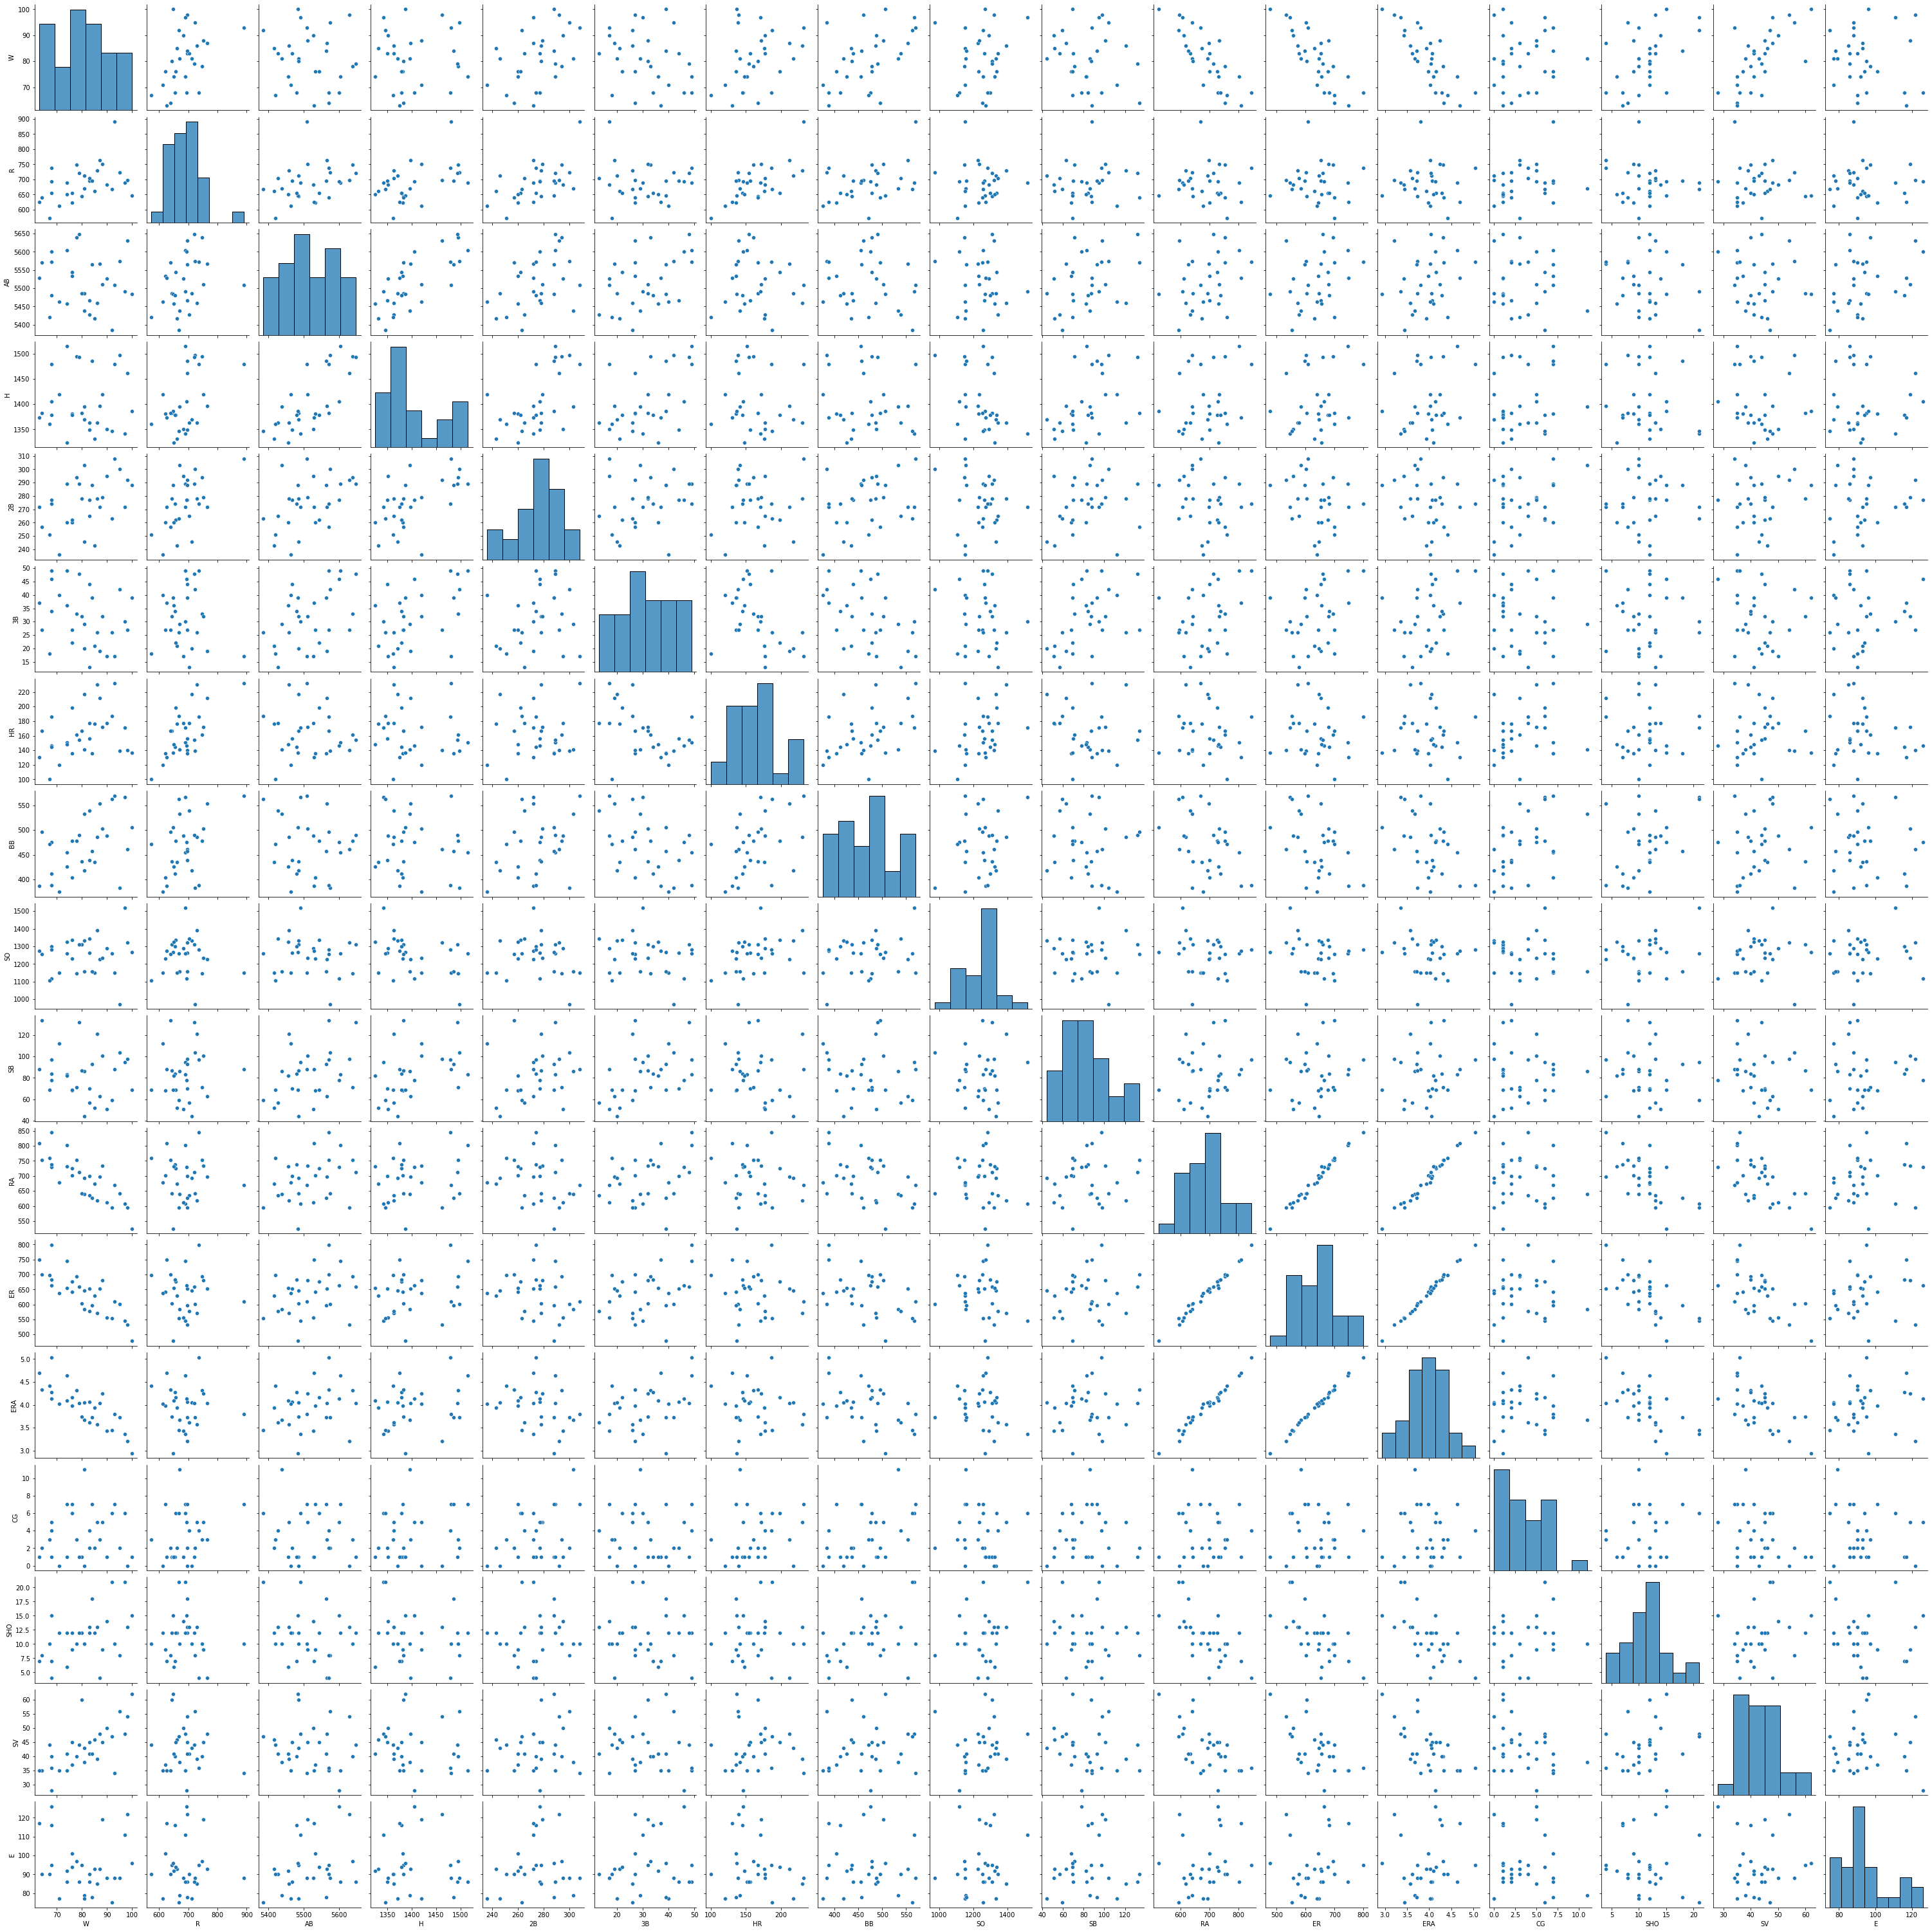

In [209]:
sns.pairplot(df)

W         AxesSubplot(0.125,0.657941;0.110714x0.222059)
R      AxesSubplot(0.257857,0.657941;0.110714x0.222059)
AB     AxesSubplot(0.390714,0.657941;0.110714x0.222059)
H      AxesSubplot(0.523571,0.657941;0.110714x0.222059)
2B     AxesSubplot(0.656429,0.657941;0.110714x0.222059)
3B     AxesSubplot(0.789286,0.657941;0.110714x0.222059)
HR        AxesSubplot(0.125,0.391471;0.110714x0.222059)
BB     AxesSubplot(0.257857,0.391471;0.110714x0.222059)
SO     AxesSubplot(0.390714,0.391471;0.110714x0.222059)
SB     AxesSubplot(0.523571,0.391471;0.110714x0.222059)
RA     AxesSubplot(0.656429,0.391471;0.110714x0.222059)
ER     AxesSubplot(0.789286,0.391471;0.110714x0.222059)
ERA          AxesSubplot(0.125,0.125;0.110714x0.222059)
CG        AxesSubplot(0.257857,0.125;0.110714x0.222059)
SHO       AxesSubplot(0.390714,0.125;0.110714x0.222059)
SV        AxesSubplot(0.523571,0.125;0.110714x0.222059)
E         AxesSubplot(0.656429,0.125;0.110714x0.222059)
dtype: object

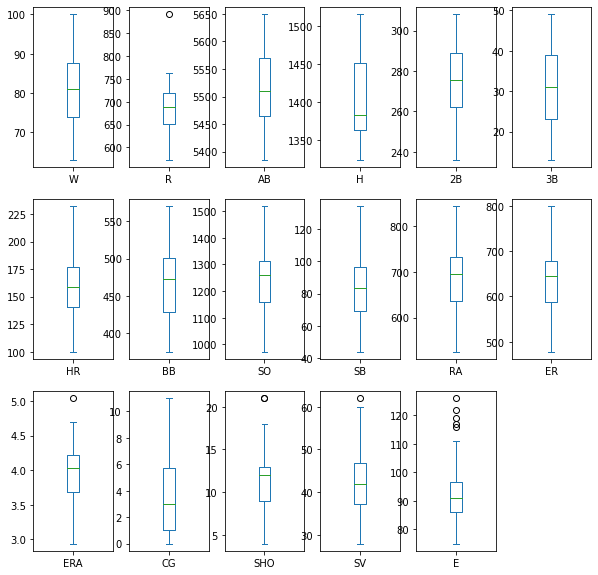

In [210]:
# finding the outliers in the data set
df.plot(kind='box',subplots=True,layout=(3,6),figsize=(10,10))

The above analysis (Box-Plots) clearly shows that there are outliers present in the data set.

In [211]:
# Finding out the correlation among the various variables.
df.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


<AxesSubplot:>

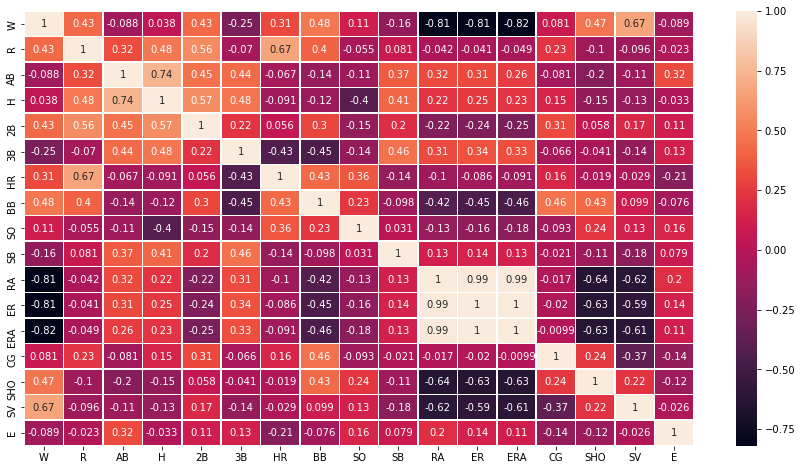

In [212]:
#Finding out the correlation with the help of heatmap
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,linewidths=0.5)

The above heatmap and the matrix shows that there is very less correlation of variables "E,CG,SB,SO" with other variables,while few variables have high negetive correlation. That might be because there is lot of varience present int the data set.Hence checking the variance with the help of Variance Inflation Factor.

In [213]:
def var_calc():
    vif=pd.DataFrame()
    vif['VIF Factor']=[variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    vif['features']=df.columns
    print(vif)

In [214]:
var_calc()

      VIF Factor features
0    1164.543214        W
1    3253.807721        R
2    5181.779465       AB
3    4817.334228        H
4    1157.105781       2B
5      32.435486       3B
6     309.301103       HR
7     302.099558       BB
8     400.292880       SO
9      28.665516       SB
10  18170.014649       RA
11  51175.790270       ER
12  23668.747242      ERA
13     10.411616       CG
14     33.258426      SHO
15    331.282416       SV
16     96.958680        E


The above values of VIF clearly shows that the Variance is high among the various factors, This might be beacusee of the multicolinearity present in the data set. Hence this has to be treated.

# Data Cleaning

Removing three variables as these are having high VIF  ERA and RA are the averages of the variables ER and R hence these are just the duplication and by the definition of the variable AB it is of no use in this model prediction, so we can also remove this variable.

In [215]:
df.drop(['RA','ERA','AB'], axis = 1, inplace=True)

#### Treating the Outliers :-- Removing Outliers

In [216]:
from scipy.stats import zscore
dfzscore=np.abs(zscore(df))
print(np.where(dfzscore>3))

(array([5], dtype=int64), array([1], dtype=int64))


In [217]:
dfnew=df[(dfzscore<3).all(axis=1)]
print('dfnew.shape',dfnew.shape)

dfnew.shape (29, 14)


by the above analysis One row is removed having the outlier

In [218]:
df=dfnew

### Splitting the data set into two parts (predictor variables (x) and target variable(y))

In [219]:
x=df.iloc[:,1:]
x

,R,H,2B,3B,HR,BB,SO,SB,ER,CG,SHO,SV,E
0,724,1497,300,42,139,383,973,104,601,2,8,56,88
1,696,1349,277,44,156,439,1264,70,653,2,12,45,86
2,669,1395,303,29,141,533,1157,86,584,11,10,38,79
3,622,1381,260,27,136,404,1231,68,643,7,9,37,101
4,689,1515,289,49,151,455,1259,83,746,7,12,35,86
6,764,1397,272,19,212,554,1227,63,652,3,4,48,93
7,713,1370,246,20,217,418,1331,44,646,0,10,43,77
8,644,1383,278,32,167,436,1310,87,604,1,12,60,95
9,748,1495,294,33,161,478,1148,71,694,3,10,40,97
10,751,1419,279,32,172,503,1233,101,680,5,9,45,119


In [220]:
x.shape

(29, 13)

In [221]:
y=df.iloc[:,0:1]
y

,W
0,95
1,83
2,81
3,76
4,74
6,87
7,81
8,80
9,78
10,88


In [222]:
y.shape

(29, 1)

In [223]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [224]:
def var_calc():
    vif=pd.DataFrame()
    vif['VIF Factor']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif['features']=x.columns
    print(vif)

In [225]:
var_calc()

     VIF Factor features
0   1468.551061        R
1   1983.244039        H
2    795.967396       2B
3     33.316629       3B
4    186.854875       HR
5    217.279415       BB
6    273.735580       SO
7     25.589673       SB
8    363.575445       ER
9      5.369278       CG
10    26.750761      SHO
11    85.041018       SV
12    70.521714        E


Though The Variance_inflation_factor of the few variables is high yet we cannot  remove them as they have high correlation with the target variable.

### Normalizing the Data

In [226]:
from sklearn.preprocessing import StandardScaler

In [227]:
scale=StandardScaler()
x=scale.fit_transform(x)
x

array([[ 0.95939835,  1.73830631,  1.55653766,  1.01084549, -0.76586314,
        -1.53635899, -2.72762331,  0.9059529 , -0.51114812, -0.50148589,
        -0.81326172,  1.64315663, -0.47109143],
       [ 0.33114717, -0.93869788,  0.20117132,  1.20891656, -0.18138864,
        -0.49502051,  0.12189552, -0.58531515,  0.23216082, -0.50148589,
         0.15929869,  0.21100645, -0.61489829],
       [-0.27466646, -0.10665604,  1.73332457, -0.2766165 , -0.69710144,
         1.25294051, -0.9258657 ,  0.11645805, -0.75415297,  2.85461197,
        -0.32698152, -0.70036184, -1.1182223 ],
       [-1.32923093, -0.35988616, -0.8006212 , -0.47468758, -0.8690057 ,
        -1.14585706, -0.20124579, -0.6730368 ,  0.08921679,  1.36301292,
        -0.57012162, -0.83055731,  0.46365315],
       [ 0.17408438,  2.0638879 ,  0.90831897,  1.70409425, -0.35329291,
        -0.19749523,  0.07293472, -0.01512442,  1.56154027,  1.36301292,
         0.15929869, -1.09094826, -0.61489829],
       [ 1.85690002, -0.070480

### Splitting the predictor variables and target variable into training and testing 

In [228]:
from sklearn.model_selection import train_test_split

In [264]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.30,random_state=45)
print('xtrain shape:',xtrain.shape)
print('ytrain shape:',ytrain.shape)
print('xtest shape:',xtest.shape)
print('ytest shape:',ytest.shape)

xtrain shape: (20, 13)
ytrain shape: (20, 1)
xtest shape: (9, 13)
ytest shape: (9, 1)


### Fitting the Model for  target variable : Win

In [265]:
# importing necessary libraries.
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [266]:
lr=LinearRegression()
lr.fit(xtrain,ytrain)
print('lr score:',lr.score(xtrain,ytrain))
predict=lr.predict(xtest)
print('r2_score:',r2_score(ytest,predict))

lr score: 0.9690850314455757
r2_score: 0.7586845215664827


In [255]:
rdg=Ridge(alpha=0.0001, random_state=45)
rdg.fit(xtrain,ytrain)
print('Ridge score:',rdg.score(xtrain,ytrain))
predict=rdg.predict(xtest)
print('r2_score:',r2_score(ytest,predict))

Ridge score: 0.9690850311560343
r2_score: 0.7587124163333965


In [256]:
lso=Lasso(alpha=.0001,random_state=45)
lso.fit(xtrain,ytrain)
print('Lasso score:',lso.score(xtrain,ytrain))
predict1=lso.predict(xtest)
print('r2 score:',r2_score(ytest,predict1))

Lasso score: 0.9690850193543974
r2 score: 0.7588336900579425


In [257]:
en=ElasticNet(alpha=0.0001, random_state=45)
en.fit(xtrain,ytrain)
print('ElasticNet score:',en.score(xtrain,ytrain))
predict2=en.predict(xtest)
print('r2 score:',r2_score(ytest,predict2))

ElasticNet score: 0.9690849821422639
r2 score: 0.7590306078789881


In [267]:
print("Mean absolute error is=",mean_absolute_error(ytest,predict2))
print("Mean squared error of dtr = ", mean_squared_error(ytest,predict2))
print("Root Mean squared error of dtr = ",np.sqrt(mean_squared_error(ytest,predict2)))

Mean absolute error is= 3.2932835601536175
Mean squared error of dtr =  20.033183784480173
Root Mean squared error of dtr =  4.475844477244509


In [258]:
dtr=DecisionTreeRegressor(criterion='mse')
dtr.fit(xtrain,ytrain)
print('dtr score:',dtr.score(xtrain,ytrain))

dtrpredict=dtr.predict(xtest)
print('dtr r2_score:', r2_score(ytest,dtrpredict))

print("Mean absolute error is=",mean_absolute_error(ytest,dtrpredict))
print("Mean squared error of dtr = ", mean_squared_error(ytest,dtrpredict))
print("Root Mean squared error of dtr = ",np.sqrt(mean_squared_error(ytest,dtrpredict)))

dtr score: 1.0
dtr r2_score: -0.2830412830412832
Mean absolute error is= 8.222222222222221
Mean squared error of dtr =  106.66666666666667
Root Mean squared error of dtr =  10.327955589886445


In [259]:
# k=5
knr=KNeighborsRegressor(n_neighbors=5)
knr.fit(xtrain,ytrain)
print('knr score:',knr.score(xtrain,ytrain))

knrpredict=knr.predict(xtest)
print('knr r2_score:',r2_score(ytest,knrpredict))

print("Mean absolute error is=",mean_absolute_error(ytest,knrpredict))
print("Mean squareed error of knr =",mean_squared_error(ytest,knrpredict))
print("Root Mean squared error of knr=",np.sqrt(mean_squared_error(ytest,knrpredict)))

knr score: 0.714317390629504
knr r2_score: 0.5707157707157704
Mean absolute error is= 5.688888888888891
Mean squareed error of knr = 35.68888888888891
Root Mean squared error of knr= 5.974017817925295


In [260]:
sgd=SGDRegressor()
sgd.fit(xtrain,ytrain)
print('sgd score:',sgd.score(xtrain,ytrain))

sgd1predict=sgd.predict(xtest)
print('sgd r2_score:', r2_score(ytest,sgd1predict))

print("Mean absolute error is=",mean_absolute_error(ytest,sgd1predict))
print("Mean squared error of sgd=",mean_squared_error(ytest,sgd1predict))
print("Root Mean squared error of sgd=",np.sqrt(mean_squared_error(ytest,sgd1predict)))

sgd score: 0.9656213971529322
sgd r2_score: 0.6534008923844898
Mean absolute error is= 3.9324087867077333
Mean squared error of sgd= 28.814794946701795
Root Mean squared error of sgd= 5.367941406787317


From the above fitted models the r2 scores of Elastic-Net feature of Linear Regression arethe best as 75.90% and RMSE scoreof 4.47 are he best one. For further improving upon the scores and model fitting going ahead with Ensemble techniques.

## Ensemble Technques

In [261]:
rfr=RandomForestRegressor()
rfr.fit(xtrain,ytrain)
print('rfr score:',rfr.score(xtrain,ytrain))

rfr1predict=rfr.predict(xtest)
print('rfr r2_score:', r2_score(ytest,rfr1predict))

print("Mean absolute error is=",mean_absolute_error(ytest,rfr1predict))
print("Mean squared error of rfr=",mean_squared_error(ytest,rfr1predict))
print("Root Mean squared error of rfr=",np.sqrt(mean_squared_error(ytest,rfr1predict)))

rfr score: 0.9559595556442494
rfr r2_score: 0.33400721710721726
Mean absolute error is= 6.122222222222222
Mean squared error of rfr= 55.36784444444443
Root Mean squared error of rfr= 7.440957226354982


In [262]:
abr=AdaBoostRegressor()
abr.fit(xtrain,ytrain)
print('abr score:',abr.score(xtrain,ytrain))

abr1predict=abr.predict(xtest)
print('abr r2_score:', r2_score(ytest,abr1predict))

print("Mean absolute error is=",mean_absolute_error(ytest,abr1predict))
print("Mean squared error of abr=",mean_squared_error(ytest,abr1predict))
print("Root Mean squared error of abr=",np.sqrt(mean_squared_error(ytest,abr1predict)))

abr score: 0.9983024999322478
abr r2_score: 0.32027769527769523
Mean absolute error is= 6.018518518518519
Mean squared error of abr= 56.50925925925926
Root Mean squared error of abr= 7.517264080718414


The scores of the above two ensemble techniques are very low as compared to the Elastic Net Regression Model hence saving the best model.

## Saving the Model.

In [270]:
import joblib

joblib.dump(lr,'lr_baseball_model.obj')

lrloadmodel=joblib.load('lr_baseball_model.obj')
pred=lrloadmodel.predict(xtest)
print((pred).round(0))

[[81.]
 [91.]
 [91.]
 [69.]
 [84.]
 [85.]
 [70.]
 [84.]
 [72.]]
